# <font color=darkred> Explore-exploit dilemma </font>

## <font color=darkblue> Epsilon-greedy Algorithm on a Bernoulli distribution : comparison between diferent values of epsilon </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
bandit_probability = [1.5,2.5,3.5]
bandit_est_prob=[1,1,1]
bandit_tries = [0,0,0]
N_tries=10000
win_rate = np.zeros(N_tries)
reward_vector=np.zeros(N_tries)
total_reward = 0
num_times_explored = 0
num_times_exploited = 0
num_optimal = 0
count_suboptimal = 0
optimal_bandit = bandit_probability.index(max(bandit_probability))

In [3]:
#returns a sample of a gaussian distribution with the mean corresponding to the slot machine picked up and variance equal to 1
# i is the parameter representing the slot machine which is played

def pull(i):
    global total_reward
    bandit_tries[i]+=1 
    x = np.random.randn()+ bandit_probability[i]    #x is the reward of the slot machine which is now a real number
    total_reward+=x
    return(x)  

In [4]:
#This function updates the estimated win rates of the slot machines, by calculating the samples mean

def update(i,x):
    if bandit_tries[i]==1:
        bandit_est_prob[i]=x
    else :
        bandit_est_prob[i] = (1/bandit_tries[i])*(bandit_est_prob[i]*(bandit_tries[i]-1)+x)

In [21]:
def epsilon_greedy(epsilon):
    global num_optimal, num_times_exploited, num_times_explored, count_suboptimal
    for i in range (N_tries):
        alea = random.random()
        if alea < epsilon:
            j = random.randrange(0,3)
            num_times_explored+=1
        else:
            j = bandit_est_prob.index(max(bandit_est_prob))
            num_times_exploited+=1
        if j == optimal_bandit:
            num_optimal+=1
        if j != optimal_bandit:
            count_suboptimal +=1
        reward = pull(j)
        reward_vector[i]=reward
        update(j,reward)
    
    print("The total reward earned is "+str(total_reward))
    print("The average reward by play is "+str(total_reward/N_tries))
    print("The number of times the slot machine was randomly chosen, so the number of times explored is "+str(num_times_explored))
    print("The number of times the slot machine was chosen by the 'greeedy way', so the number of times exploited is "+str(num_times_exploited))
    print("The ratio of optimal choice is "+str(100*num_optimal/N_tries)+"%")
    print("Percent suboptimal for epsilon = "+str(epsilon)+" is "+str(100*count_suboptimal/N_tries)+"%")
    
    cumulative_average=np.cumsum(reward_vector)/(np.arange(N_tries)+1)
    sub1=np.ones(N_tries)*bandit_probability[0]
    sub2=np.ones(N_tries)*bandit_probability[1]
    sub3=np.ones(N_tries)*bandit_probability[2]

    plt.figure(figsize=(15, 9))
    plt.plot(cumulative_average[:], 'r', lw=1.5, label='Cumulative average')
    plt.plot(sub1[:], lw=1.5, label='Mean = 1.5')
    plt.plot(sub2[:], lw=1.5, label='Mean = 2.5')
    plt.plot(sub3[:], lw=1.5, label='Mean = 3.5')
    plt.xlabel('Number of tries')
    plt.ylabel('Reward')
    plt.legend()
    plt.title("Evolution of the reward through time with epsilon = "+str(epsilon))
    #plt.xscale('log')
    plt.show()

The total reward earned is 33922.382234735436
The average reward by play is 3.3922382234735435
The number of times the slot machine was randomly chosen, so the number of times explored is 1000
The number of times the slot machine was chosen by the 'greeedy way', so the number of times exploited is 9000
The ratio of optimal choice is 92.8%
Percent suboptimal for epsilon = 0.1 is 7.2%


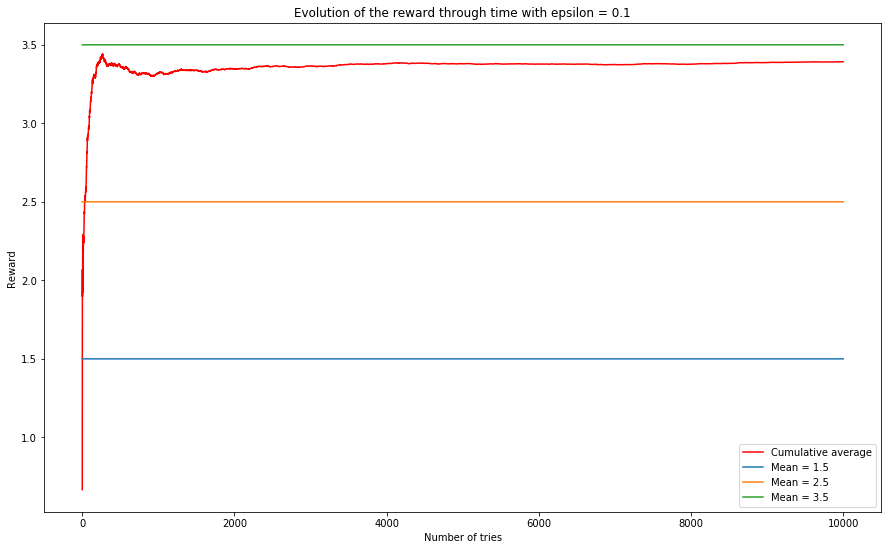

In [23]:
epsilon_greedy(0.1)

The total reward earned is 34429.31817201564
The average reward by play is 3.4429318172015644
The number of times the slot machine was randomly chosen, so the number of times explored is 499
The number of times the slot machine was chosen by the 'greeedy way', so the number of times exploited is 9501
The ratio of optimal choice is 96.25%
Percent suboptimal for epsilon = 0.05 is 3.75%


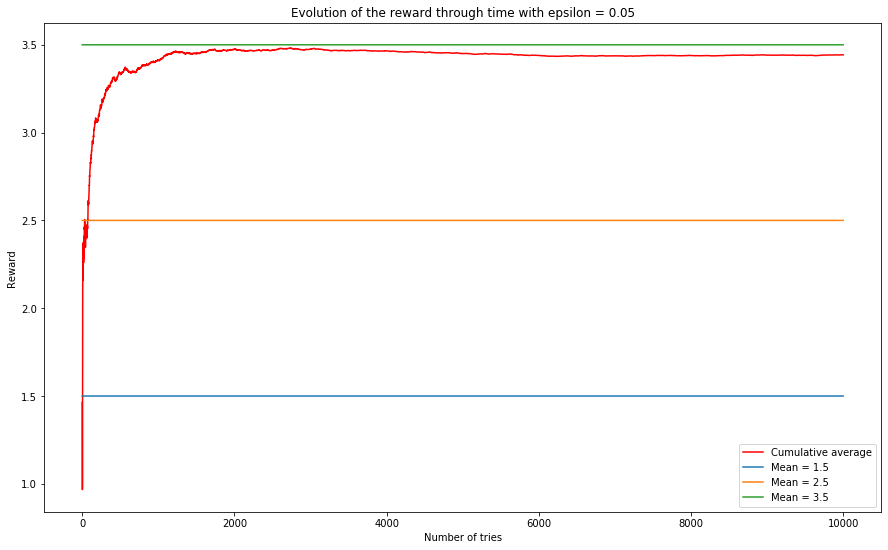

In [25]:
epsilon_greedy(0.05)

The total reward earned is 34520.82909018193
The average reward by play is 3.4520829090181926
The number of times the slot machine was randomly chosen, so the number of times explored is 92
The number of times the slot machine was chosen by the 'greeedy way', so the number of times exploited is 9908
The ratio of optimal choice is 97.1%
Percent suboptimal for epsilon = 0.01 is 2.9%


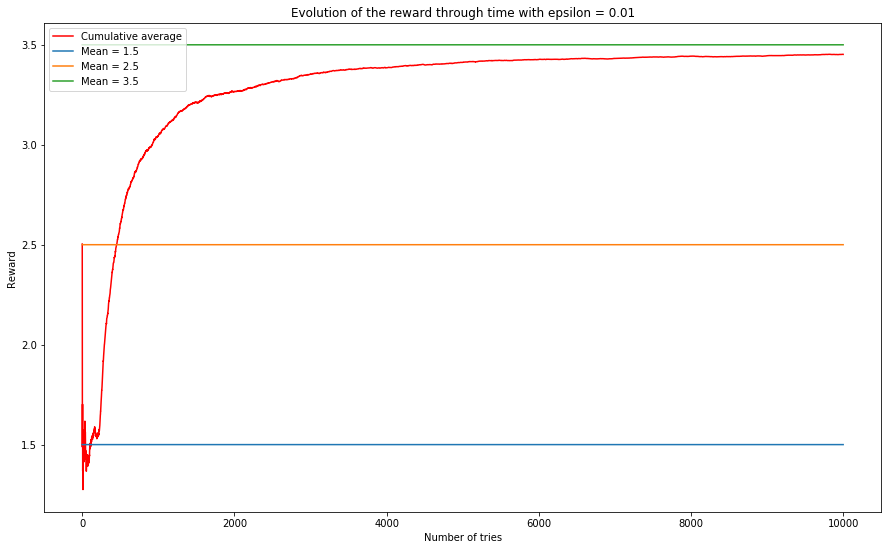

In [27]:
epsilon_greedy(0.01)

The total reward earned is 14972.361684374562
The average reward by play is 1.4972361684374562
The number of times the slot machine was randomly chosen, so the number of times explored is 0
The number of times the slot machine was chosen by the 'greeedy way', so the number of times exploited is 10000
The ratio of optimal choice is 0.0%
Percent suboptimal for epsilon = 0 is 100.0%


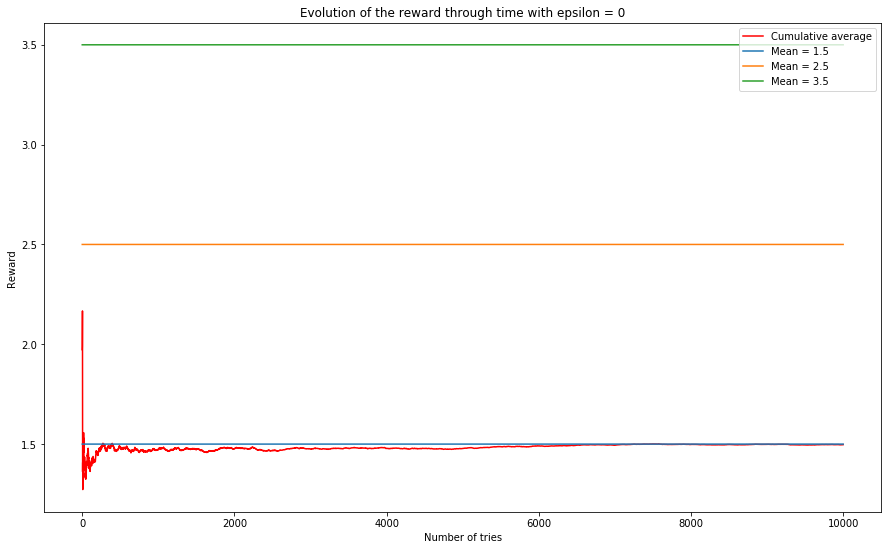

In [29]:
epsilon_greedy(0)

## <font color=darkblue> Conclusion and remarks </font>

We can see that when epsilon is set to 0, the algorithm chose the first casino machine with the worst reward. This highlights the importance of the parameter epsilon in order to do not fall in these suboptimals. 

We can add a remark : the more epsilon increase (in these 4 cases), the quicker the convergence of the algorithm towards the optimal, but it can injure the total reward earned. For epsilon equals 0.05 or 0.1, a higher cumulative reward is obtained more quickly than when epsilon equals 0.01. But, as in epsilon percent of the plays the agent chooses a random casino machine, it decreases the total reward earned. 

So, we need to find a good compromise between the speed of convergence and the total reward. This needs to be set regarding the scenarios. For instance, if each play costs a lot of money, then epsilon should be chosen equal to 0.1 rather than 0.01 to find the optimal quicker. If the outcome is just to maximise the total reward, regardless of the number of tries to get this result, then epsilon should be chosen low. 